In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import sympy as sym

In [7]:
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]

happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]
happiness_oops1 = [170,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]
happiness_oops2 = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,170]

In [8]:
X = np.hstack((np.ones((20,1)), np.array(numcourses, ndmin = 2).T))
XLI = np.linalg.inv(X.T @ X) @ X.T

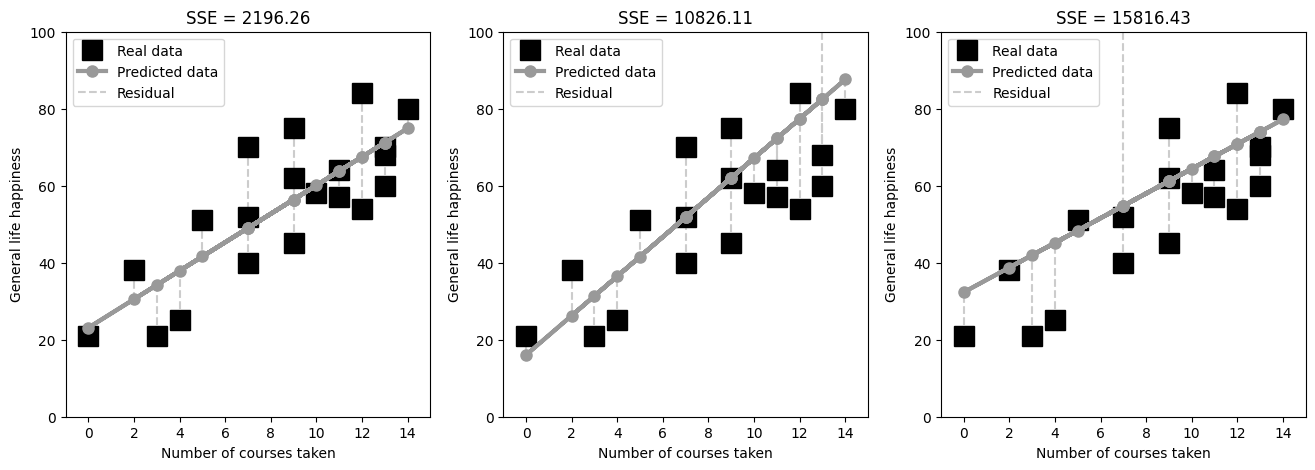

In [10]:
_, axs = plt.subplots(1,3,figsize=(16, 5))

for axi, y in zip(axs, [happiness, happiness_oops1, happiness_oops2]):

    beta = XLI @ y
    pred_happiness = X @ beta

    axi.plot(numcourses, y, 'ks', markersize = 15)
    axi.plot(numcourses, pred_happiness, 'o-', color=[.6,.6,.6], linewidth = 3, markersize = 8)
    
    for n,yy,yHat in zip(numcourses,y,pred_happiness):
        axi.plot([n,n],[yy,yHat],'--',color=[.8,.8,.8],zorder=-10)

    axi.set(xlabel = 'Number of courses taken', ylabel = 'General life happiness', xlim = [-1, 15], ylim = [0, 100], xticks = range(0, 15, 2))
    axi.legend(['Real data','Predicted data','Residual'])
    axi.set_title(f'SSE = {np.sum((pred_happiness-y)**2):.2f}')
